In [69]:
import os
import json
import spacy
import spacy
import math
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import preprocess as prep

import utils_data as ud

from pprint import pprint
%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
nlp = spacy.load("en_core_web_lg")
animes = ud.load_animes_to_memory("data")

In [4]:
wc = ud.get_normalized_word_count(animes)

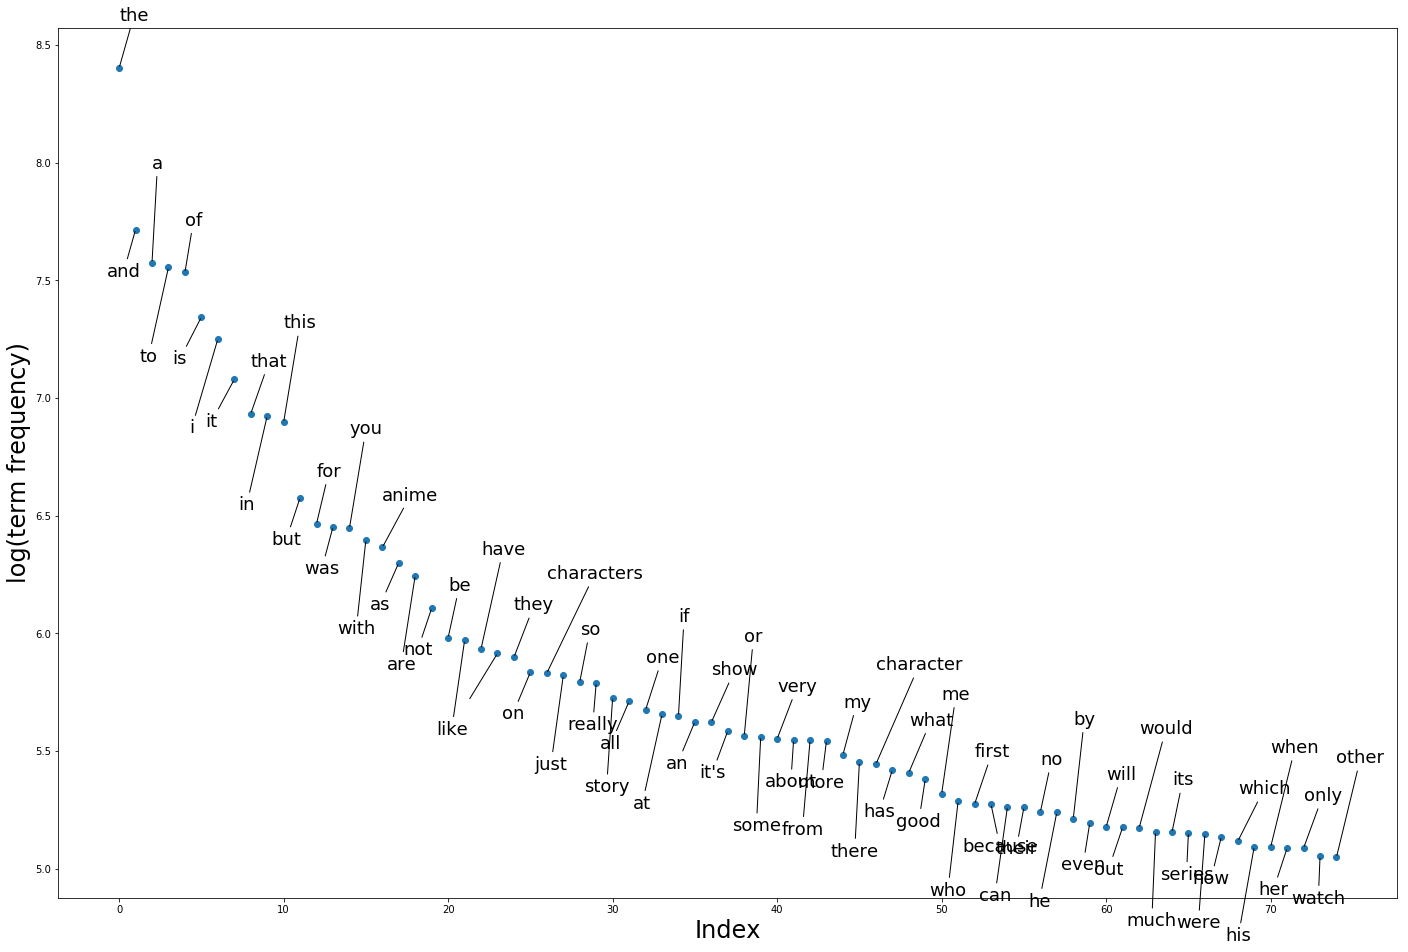

In [5]:
ud.plot_normalized_word_counts(wc, most_common=75)

In [6]:
STOP_WORDS = set([word[0] for word in wc.most_common(75)])
DIFF_STOP_WORDS = set(["anime", "season", "good", "not", "episode", "very", "more", 
                      "character", "characters", "main", "story", "plot", "watch", 
                       "series", "love", "art", "pretty", "up", "event", "like"])
STOP_WORDS.difference_update(DIFF_STOP_WORDS)

In [110]:
animes_df = pd.read_json("data/mal_data.json", orient='index')

In [ ]:
animes_df = prep.preprocess_df(animes_df, nlp, STOP_WORDS)

In [131]:
animes_df = pd.read_hdf("data/mal_synopsis_vectors.hdf5", "table")

In [132]:
animes_df.head()

,completed,dropped,favorites,mal_id,members,on_hold,plan_to_watch,popularity,rank,scored_by,title_english,total,watching,season_Fall,season_Spring,season_Summer,season_Winter,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,is_Poor,is_Below_Average,is_Average,is_Above_Average,is_Excellent,has_Prequel,has_Sequel,is_Light novel,is_Manga,is_Original,is_Visual novel,synopsis_vector,is_Action,is_Adventure,is_Comedy,is_Drama,is_Ecchi,is_Fantasy,is_Harem,is_Josei,is_Mystery,is_Romance,is_School,is_Sci-Fi,is_Seinen,is_Shoujo,is_Shounen,is_Slice of Life,is_Supernatural
0,173228,2949,1180,10030,227168,5506,37421,399,119,136209,Bakuman.,227184,8080,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,"[0.05492507, -0.0015817462, -0.023030212, 0.00...",0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,27566,9598,739,10033,79840,8156,22607,1224,1212,25609,Toriko,79849,11922,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,"[-0.06320087, -0.024732614, 0.04239033, -0.118...",1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,78096,1925,586,10049,109049,2952,20868,946,474,56856,Nura: Rise of the Yokai Clan - Demon Capital,109074,5233,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,"[0.05399442, 0.02428066, -0.054012954, 0.01463...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,58933,4328,108,10073,91658,2717,22014,1082,5710,41283,The Qwaser of Stigmata II,91658,3666,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,"[-0.07319363, 0.033280805, 0.08378588, 0.10794...",1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,86865,3594,311,10079,121486,2502,23732,837,3977,64249,A Bridge to the Starry Skies,121486,4793,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,"[0.03607239, 0.10807864, -0.17572518, -0.01210...",0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0


In [9]:
gc, gc_ids = ud.count_genres(animes)

In [10]:
gc.most_common(15)

[('Comedy', 456),
 ('Action', 376),
 ('Romance', 321),
 ('School', 295),
 ('Supernatural', 247),
 ('Fantasy', 240),
 ('Drama', 226),
 ('Shounen', 207),
 ('Slice of Life', 169),
 ('Sci-Fi', 146),
 ('Ecchi', 136),
 ('Adventure', 130),
 ('Seinen', 125),
 ('Harem', 121),
 ('Mystery', 119)]

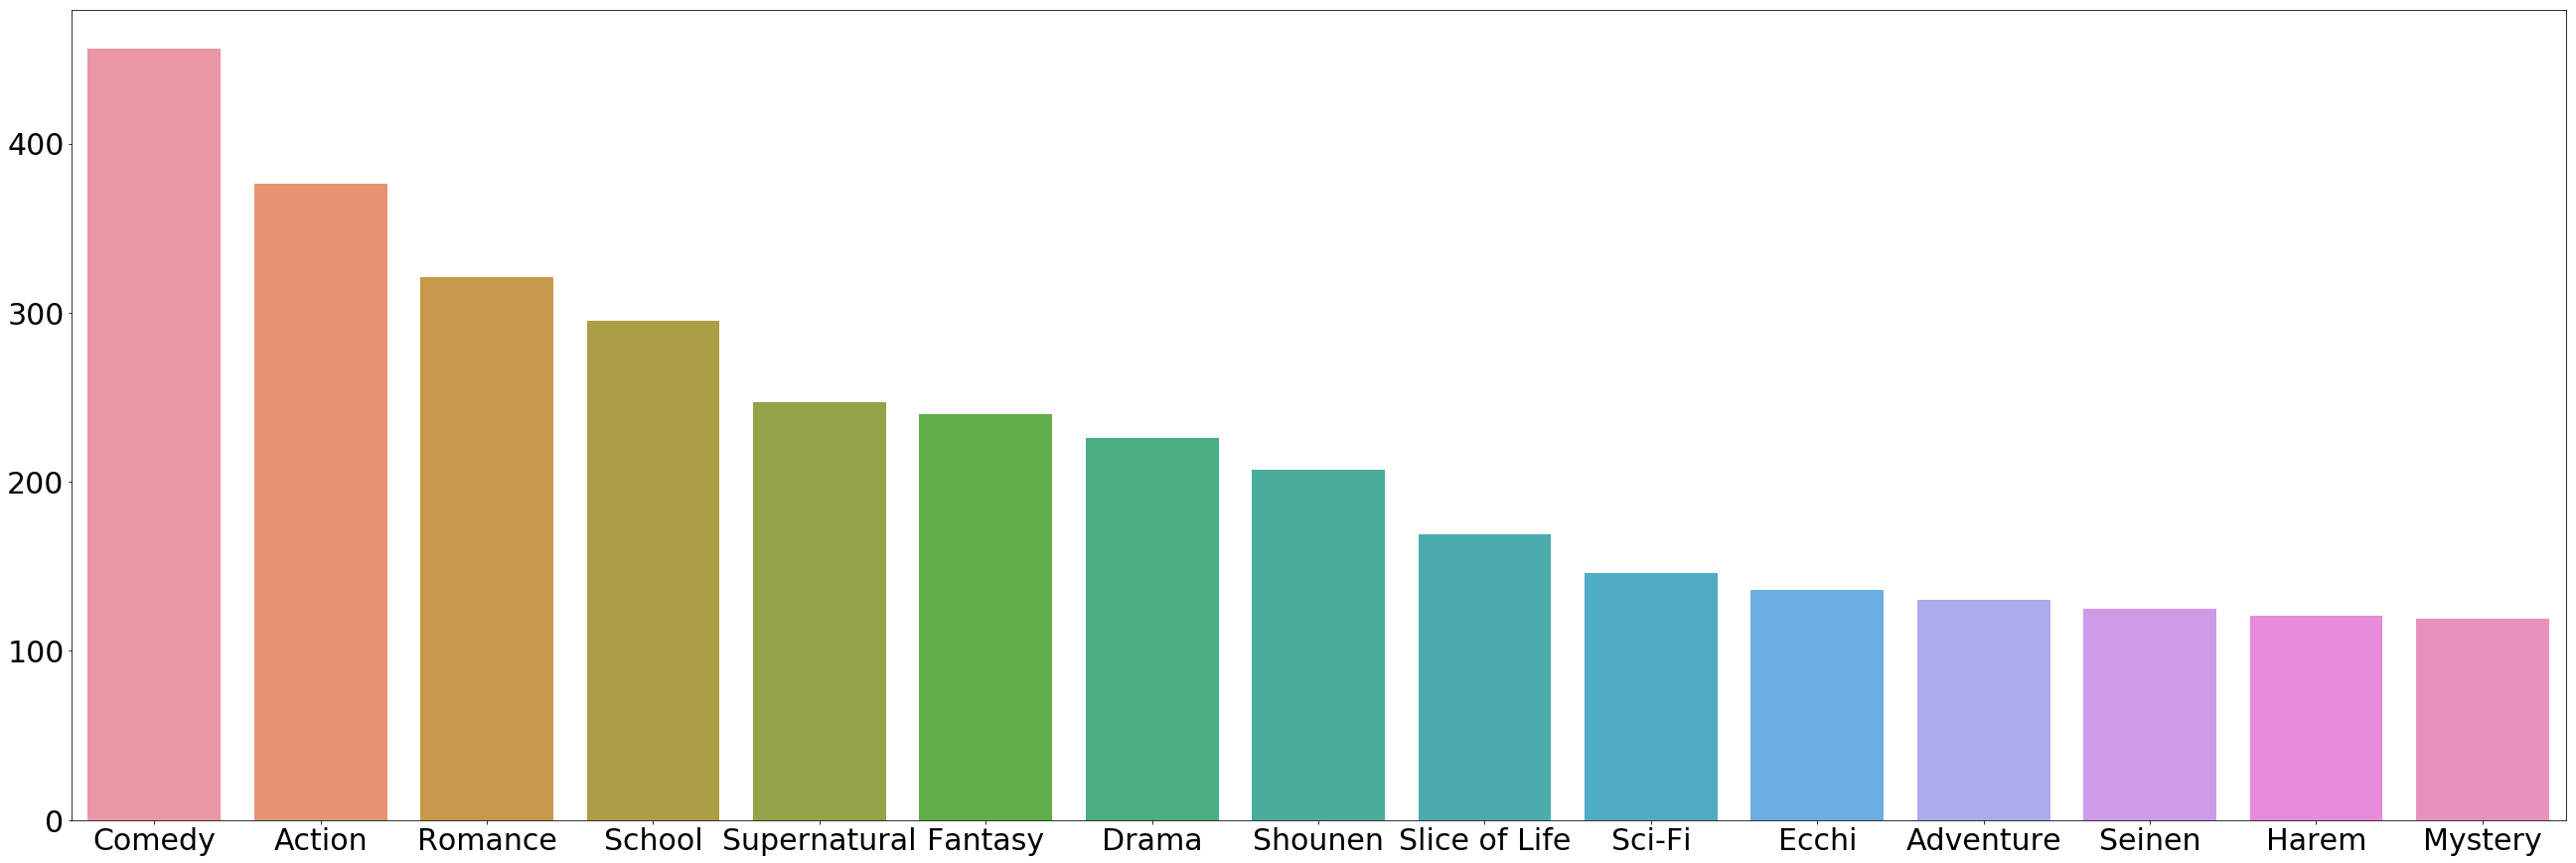

In [11]:
fig, ax = plt.subplots(figsize=(45,15))
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
sns.barplot([x[0] for x in gc.most_common(15)], 
        [x[1] for x in gc.most_common(15)])

In [150]:
genres = [x[0] for x in gc.most_common(15)]
genres.append("Shoujo")
genres.append("Josei")

all_genres = [x for x in gc]
ignore_genres = set(all_genres).difference(set(genres))

gen_by_pop = ud.get_x_by_y(animes, "genres", "popularity")
gen_by_scores = ud.get_x_by_y(animes, "genres", "score", ignore=ignore_genres)
stds_by_score = ud.get_x_by_y(animes, "studios", "score", drop_count=5)
stds_by_pop = ud.get_x_by_y(animes, "studios", "popularity", drop_count=5)
stds_by_rank = ud.get_x_by_y(animes, "studios", "rank", drop_count=5)
prem_by_rank = ud.get_x_by_y(animes, "premiered", "rank", subfield=None)
prem_by_score = ud.get_x_by_y(animes, "premiered", "score", subfield=None)

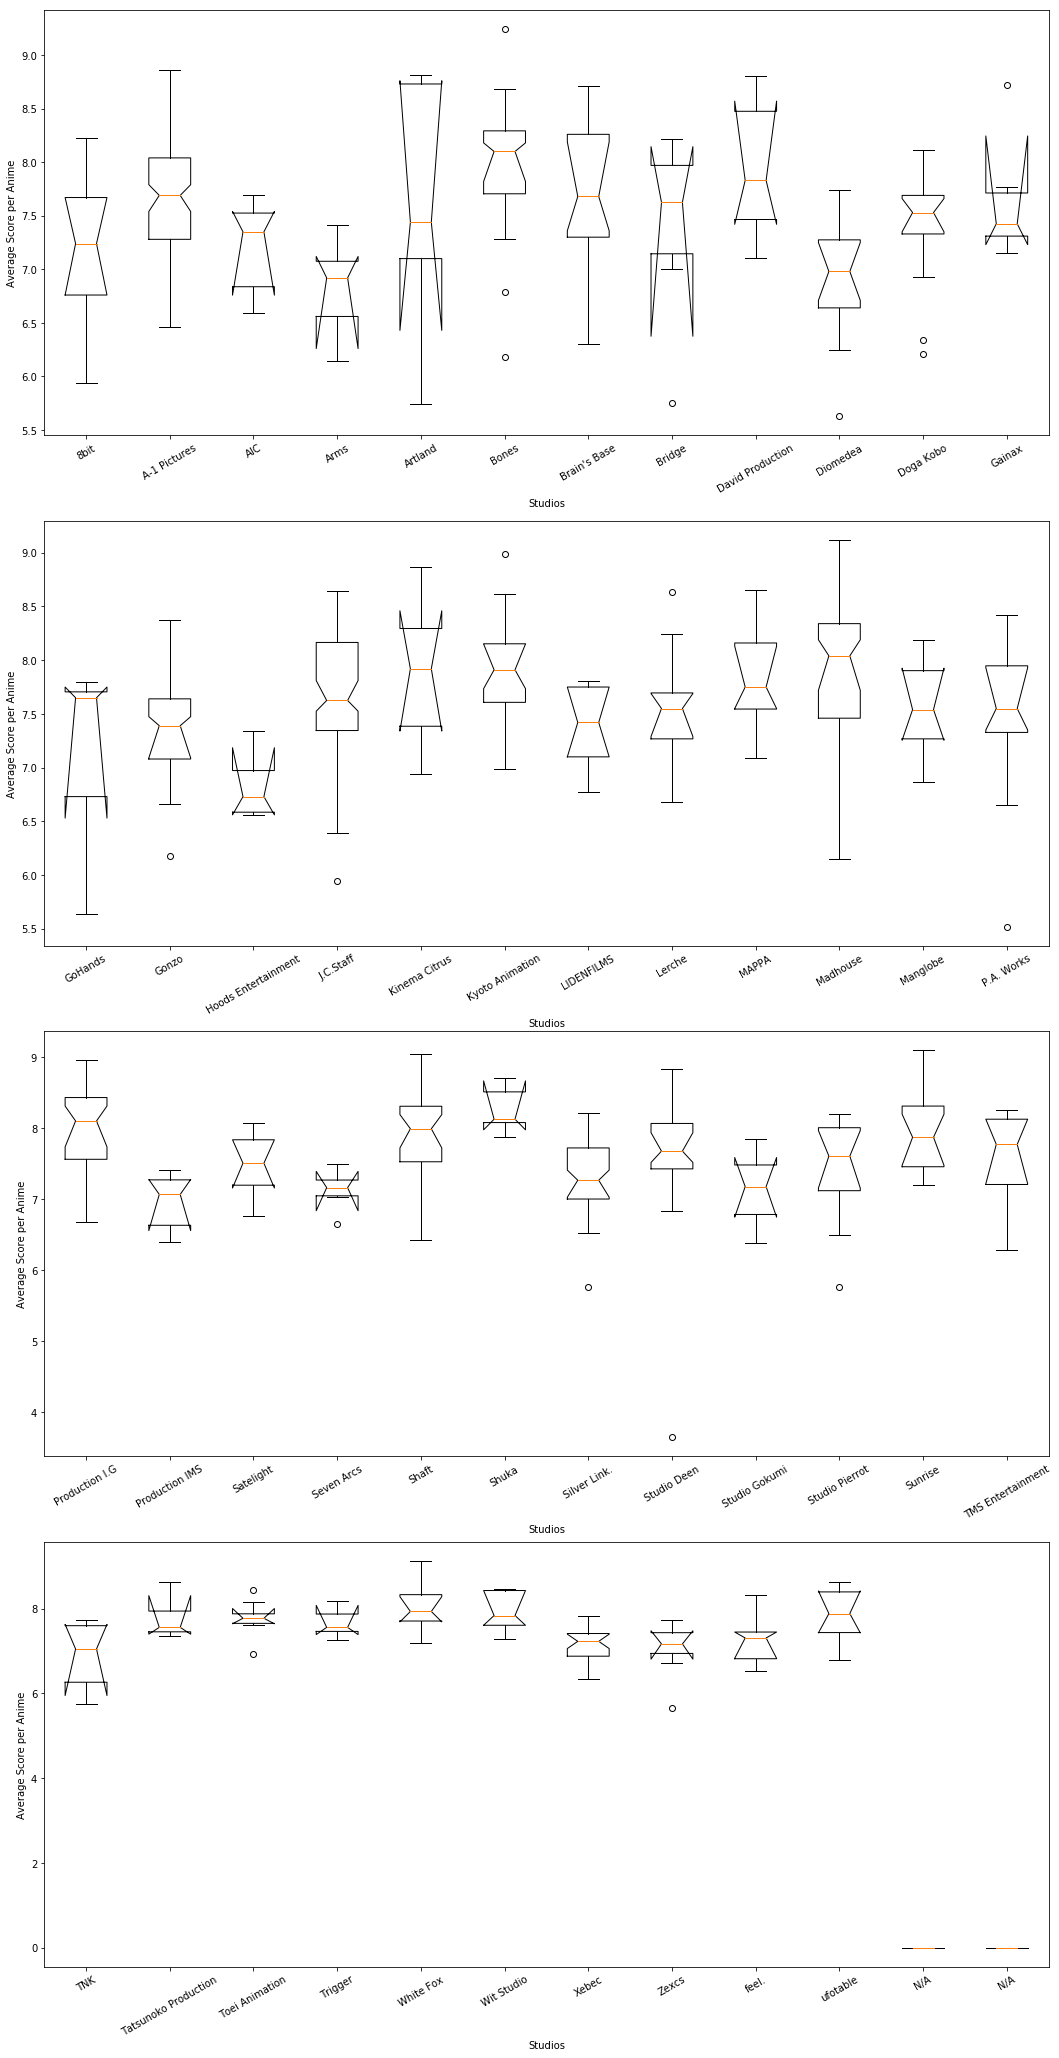

In [149]:
ud.boxplot_x_by_y(stds_by_score, "Studios", "Average Score per Anime")

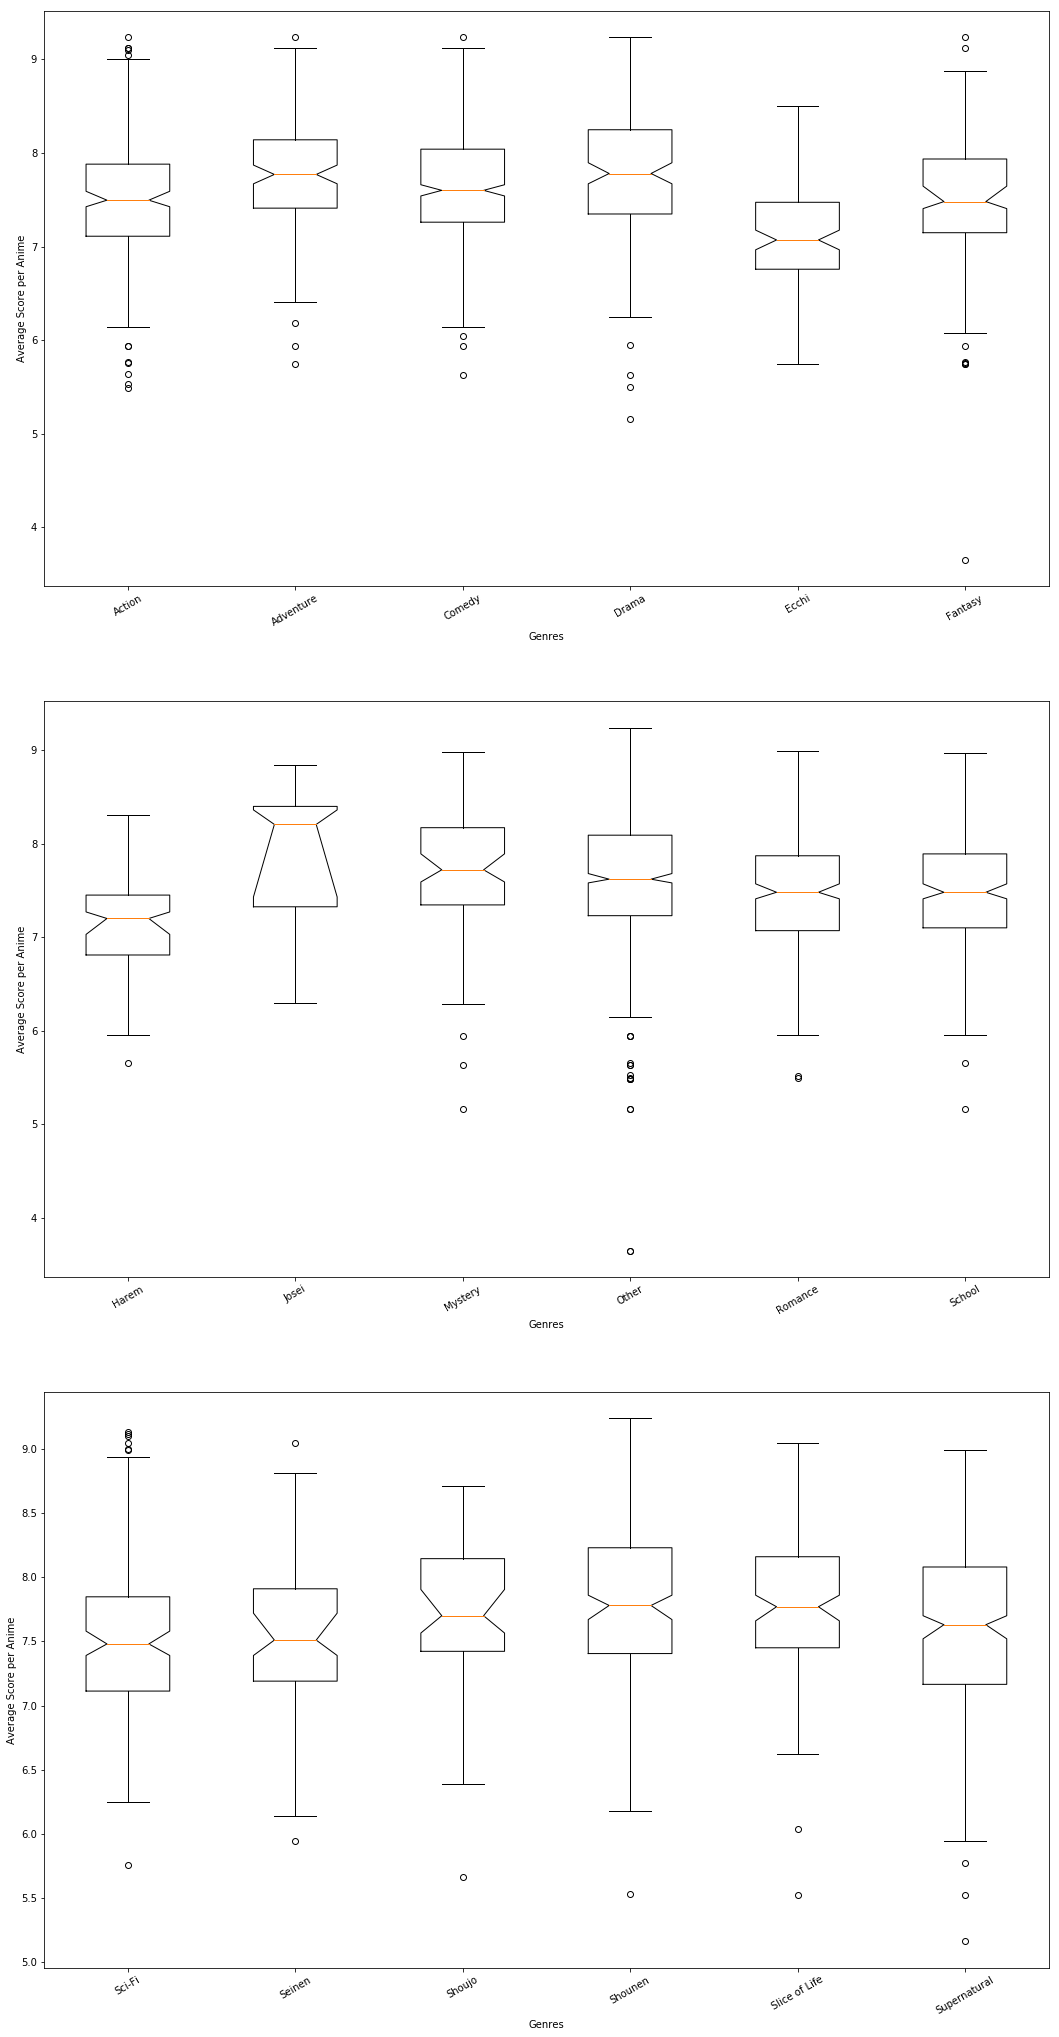

In [13]:
ud.boxplot_x_by_y(gen_by_scores, "Genres", "Average Score per Anime", n_in_row=6)

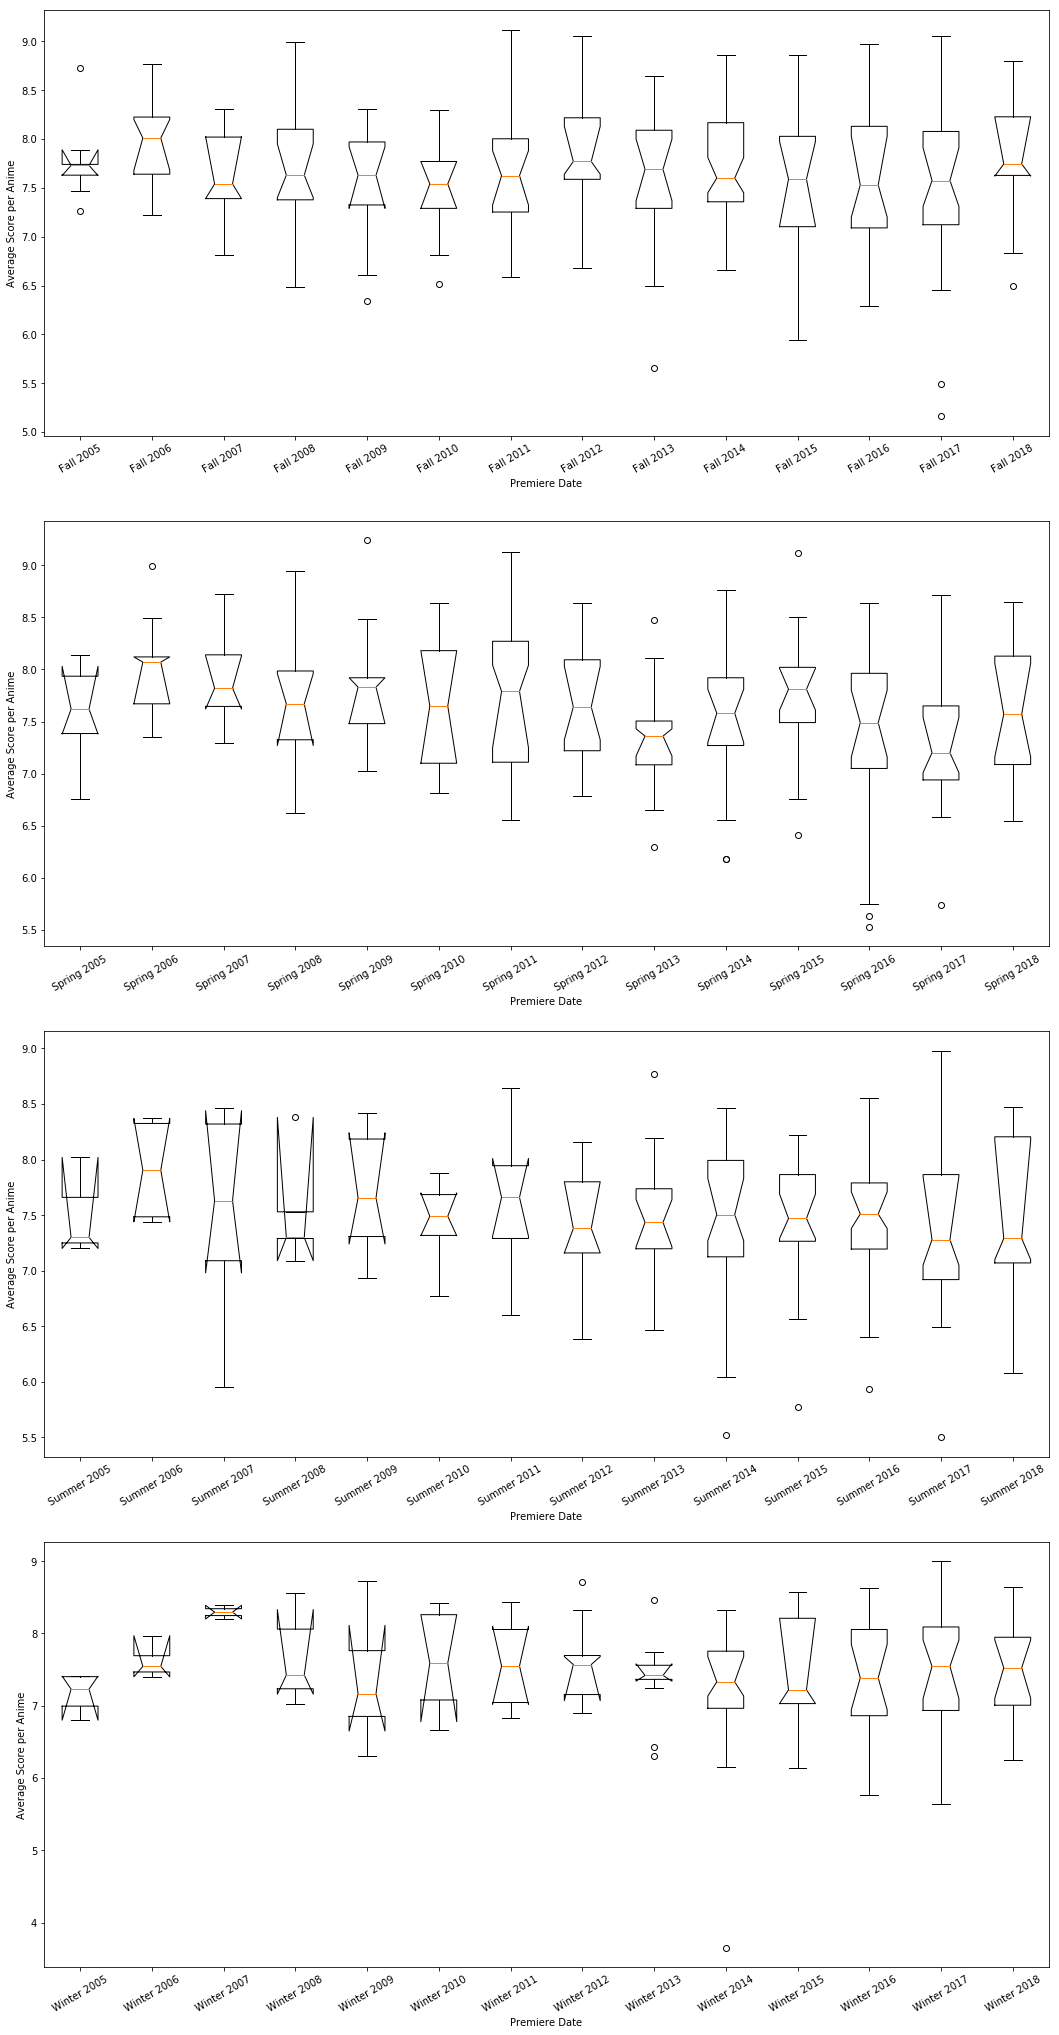

In [14]:
ud.boxplot_x_by_y(prem_by_score, "Premiere Date", "Average Score per Anime", n_in_row=14)

Break points were decided by examining quantiles of data, such that it captured what I think viewers usually rate an anime (e.g. 6-10).

score < 7.08          --> poor

7.08 <= score < 7.42  --> below average

7.42 <= score < 8.13  --> average

8.13 <= score < 8.39  --> above average

8.39 <= score         --> excellent